In [2]:
import pandas as pd
import numpy as np

In [3]:
from skimpy import clean_columns

In [4]:
df = pd.read_csv("LakeData.csv", low_memory = False)

In [5]:
df2 = pd.read_csv("Lake physical data.csv", low_memory = False)
df2

,Lake,Surface Area (acres),Watershed (acres),average depth (ft),maximum depth (ft)
0,Wawasee,3006,24448,22.0,81
1,Syracuse,411,24498,13.0,34
2,Dewart,554,5059,16.0,82
3,Webster,653,31459,12.5,52
4,James,278,35776,27.0,62
5,Tippecanoe,876,72847,37.0,122
6,Oswego,78,72847,13.7,37
7,Big Barbee,311,28737,15.6,45
8,Big Chapman,504,4500,12.5,39
9,Center,120,9611,NaN,43


In [6]:
df2.rename(columns={'Lake': 'lake_name'}, inplace=True)

In [7]:
clean_df2 = clean_columns(df2)
clean_df2.columns.tolist()

4 column names have been cleaned

['lake_name',
 'surface_area_acres',
 'watershed_acres',
 'average_depth_ft',
 'maximum_depth_ft']

In [8]:
clean_df2.rename(columns={'lake': 'lake_name'}, inplace=True)

# Clean the Data

In [16]:
merge_df = pd.merge(clean_df, clean_df2, on="lake_name")
merge_df

,lake_name,site_type,id_#,date,time,pw,w,total_depth_m,secchi_depth,depth_m,...,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51,surface_area_acres,watershed_acres,average_depth_ft,maximum_depth_ft
0,Beaver Dam,Open,21221BEA2,8/9/2021,15:40,S,S,18.5,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
1,Beaver Dam,Open,18190BEA2,7/9/2018,15:00,S,S,18.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
2,Beaver Dam,Open,18204BEA2,7/23/2018,15:15,R,R,19.0,5.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
3,Beaver Dam,Open,18211BEA2,7/31/2018,15:00,O,O,18.6,4.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
4,Beaver Dam,Open,18218BEA2,8/6/2018,14:45,S,O,18.8,4.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22223,Yellow Creek,Open,16235YEL2,8/22/2016,14:00,S,S,21.8,4.1,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,2160,31.6,67
22224,Yellow Creek,Open,16242YEL2,8/29/2016,14:30,R,S,21.7,4.2,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,2160,31.6,67
22225,Yellow Creek,Open,17163YEL2,6/12/2017,14:45,S,S,22.0,3.4,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,2160,31.6,67
22226,Yellow Creek,Open,17198YEL2,7/17/2017,15:15,S,P/C,22.2,1.5,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155,2160,31.6,67


In [604]:
m_df = merge_df.drop(['site_type','mc_id', 'ac_id', 'pw', 'w', 'epi_hypo', 'notes'], axis = 1).dropna(how = "all")
m_df.head()

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51,surface_area_acres,watershed_acres,average_depth_ft,maximum_depth_ft
0,Beaver Dam,21221BEA2,8/9/2021,15:40,18.5,2.5,0.0,26.90,113.4,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
1,Beaver Dam,18190BEA2,7/9/2018,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
2,Beaver Dam,18204BEA2,7/23/2018,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
3,Beaver Dam,18211BEA2,7/31/2018,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61
4,Beaver Dam,18218BEA2,8/6/2018,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,155,1266,15.6,61


In [6]:
list(df.columns)

['Lake Name',
 'Site type',
 'ID #',
 'Date',
 'Time',
 'PW',
 'W',
 'TotalDepth(m)',
 'SecchiDepth',
 'Depth(m)',
 'Epi/Hypo',
 'WaterTemp(CelS)',
 'DO(% sat)',
 'DO(mg/l)',
 'pH',
 'Con (mS/cm)',
 'MC ID',
 'AC ID',
 'Nutrient ID',
 'Layer',
 'AT (°C)',
 'Bar P (mbar)',
 'Alt (m)',
 'Max WS (m/h)',
 'Avg WS (m/h)',
 'Wind Direction',
 'Chloro 1 Fluorosense',
 'Chloro  2 Fluorosense',
 'Phyco 1  Fluorosense',
 'Phyco 2 Fluorosense',
 'MC (ppb)',
 'NH3',
 'Cl',
 'SO4',
 'NO2',
 'NO3',
 'SiO2',
 'SRP',
 'TP',
 'TKN',
 'TN',
 'COND',
 'SS',
 'F',
 'Notes',
 'Quanta #',
 'Weather Meter #',
 'Fluorometer #',
 'Aquafluor #',
 'Van Dorn #',
 'Unnamed: 50',
 'Unnamed: 51']

In [9]:
clean_df = clean_columns(df)
c_df = clean_df.drop(['site_type','mc_id', 'ac_id', 'pw', 'w', 'epi_hypo', 'notes'], axis = 1).dropna(how = "all")
c_df.head()

52 column names have been cleaned

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,cond,ss,f,quanta_#,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51
0,Beaver Dam,21221BEA2,8/9/2021,15:40,18.5,2.5,0.0,26.90,113.4,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaver Dam,18190BEA2,7/9/2018,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Beaver Dam,18204BEA2,7/23/2018,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beaver Dam,18211BEA2,7/31/2018,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beaver Dam,18218BEA2,8/6/2018,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
c_df

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,cond,ss,f,quanta_#,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51
0,Beaver Dam,21221BEA2,8/9/2021,15:40,18.5,2.5,0.0,26.90,113.4,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaver Dam,18190BEA2,7/9/2018,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Beaver Dam,18204BEA2,7/23/2018,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beaver Dam,18211BEA2,7/31/2018,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beaver Dam,18218BEA2,8/6/2018,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22764,Tippecanoe,21160TIP2,6/9/2021,9:41,37.4,13.4,36.0,5.40,3.1,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22765,Tippecanoe,21195TIP2,7/14/2021,11:11,37.8,6.4,36.0,5.50,10.6,1.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22766,Tippecanoe,21202TIP2,7/21/2021,11:00,37.8,8.0,36.0,5.50,4.6,0.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22767,Tippecanoe,21209TIP2,7/28/2021,11:25,38.4,8.5,36.0,5.50,5.6,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
', '.join(list(clean_df.columns))

'lake_name, site_type, id_#, date, time, pw, w, total_depth_m, secchi_depth, depth_m, epi_hypo, water_temp_cel_s, do_%_sat, do_mg_l, p_h, con_m_s_cm, mc_id, ac_id, nutrient_id, layer, at_c, bar_p_mbar, alt_m, max_ws_m_h, avg_ws_m_h, wind_direction, chloro_1_fluorosense, chloro_2_fluorosense, phyco_1_fluorosense, phyco_2_fluorosense, mc_ppb, nh_3, cl, so_4, no_2, no_3, si_o_2, srp, tp, tkn, tn, cond, ss, f, notes, quanta_#, weather_meter_#, fluorometer_#, aquafluor_#, van_dorn_#, unnamed_50, unnamed_51'

## Plot data and look for relationships

In [13]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [14]:
cdf = clean_df[["do_mg_l", "mc_ppb", "water_temp_cel_s"]]
cdf.head(9)

,do_mg_l,mc_ppb,water_temp_cel_s
0,9.05,NaN,26.90
1,8.75,0.075,28.83
2,7.27,0.075,25.21
3,8.55,0.075,25.10
4,9.30,0.075,28.77
5,13.83,0.075,22.40
6,12.27,0.075,25.40
7,10.82,0.075,23.70
8,8.15,0.075,26.30


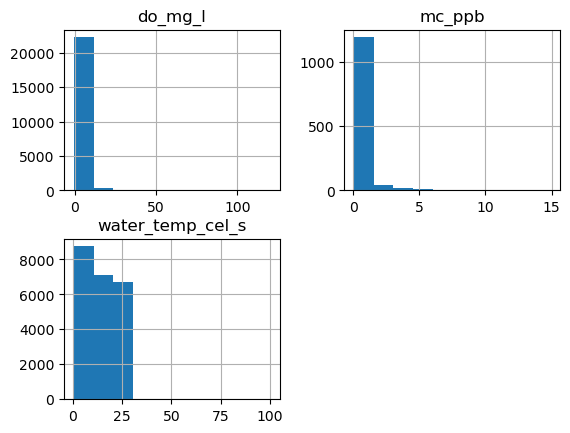

In [15]:
viz = cdf[["do_mg_l", "mc_ppb", "water_temp_cel_s"]]
viz.hist()
plt.show()

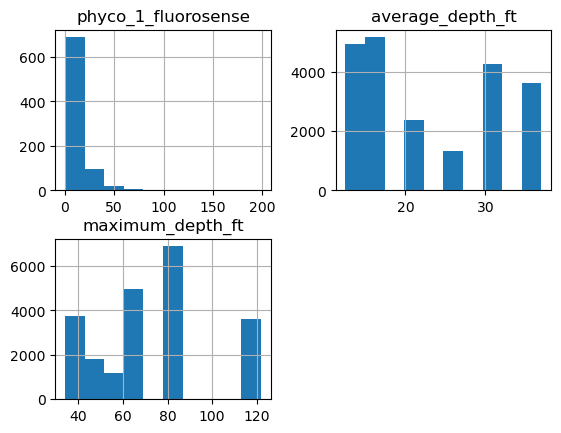

In [602]:
viz = m_df[["chloro_1_fluorosense", "phyco_1_fluorosense", "average_depth_ft", "maximum_depth_ft"]]
viz.hist()
plt.show()

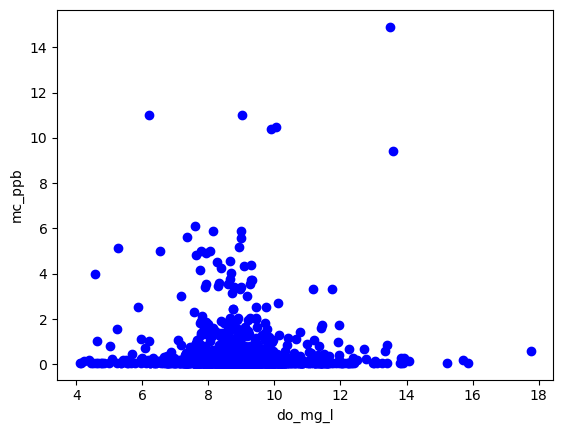

In [16]:
plt.scatter(cdf.do_mg_l, cdf.mc_ppb,  color='blue')
plt.xlabel("do_mg_l")
plt.ylabel("mc_ppb")
plt.show()

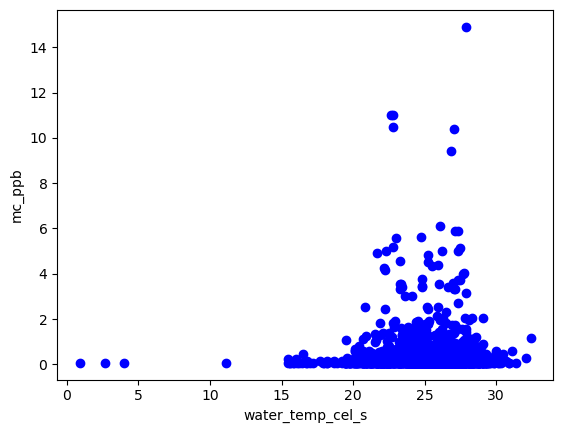

In [17]:
plt.scatter(cdf.water_temp_cel_s, cdf.mc_ppb,  color='blue')
plt.xlabel("water_temp_cel_s")
plt.ylabel("mc_ppb")
plt.show()

In [500]:
clean_df_lin = cdf.dropna()
clean_df_lin

msk = np.random.rand(len(clean_df_lin)) < 0.8
train = clean_df_lin[msk]
test = clean_df_lin[~msk]

## Single Linear Regression

### Relationship Between Dissolved Oxygen and Microcystin

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['do_mg_l']])
train_y = np.asanyarray(train[['mc_ppb']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.03713026]]
Intercept:  [0.122413]


Text(0, 0.5, 'Microcystin (ppb)')

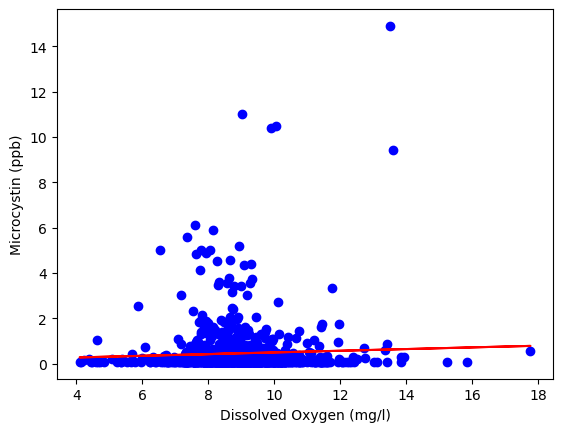

In [20]:
plt.scatter(train.do_mg_l, train.mc_ppb,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Dissolved Oxygen (mg/l)")
plt.ylabel("Microcystin (ppb)")

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["do_mg_l"]])
test_y = np.asanyarray(test[['mc_ppb']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.54
Residual sum of squares (MSE): 1.21
R2-score: -0.02


### Relationship between Water Temperature and Microcystin

In [22]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['water_temp_cel_s']])
train_y = np.asanyarray(train[['mc_ppb']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00857484]]
Intercept:  [0.23632006]


Text(0, 0.5, 'Microcystin (ppb)')

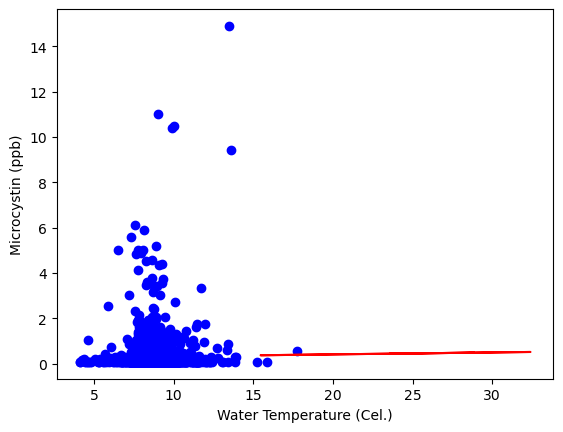

In [23]:
plt.scatter(train.do_mg_l, train.mc_ppb,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Water Temperature (Cel.)")
plt.ylabel("Microcystin (ppb)")

In [24]:
test_x = np.asanyarray(test[["water_temp_cel_s"]])
test_y = np.asanyarray(test[['mc_ppb']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.53
Residual sum of squares (MSE): 1.18
R2-score: 0.00


### For both models, the R^2 score was 0, meaning the model proves to be of little use

In [618]:
clean_df_lin = cdf.dropna()
clean_df_lin

,do_mg_l,mc_ppb,water_temp_cel_s
1,8.75,0.075,28.83
2,7.27,0.075,25.21
3,8.55,0.075,25.10
4,9.30,0.075,28.77
5,13.83,0.075,22.40
...,...,...,...
2618,7.36,0.075,27.00
2619,9.40,0.075,21.30
2620,7.61,0.075,24.40
2621,9.44,0.075,27.58


In [619]:
clean_df_lin['mc_ppb'] = np.log(clean_df_lin.mc_ppb) + .0001

In [620]:
clean_df_lin['do_mg_l'] = np.log(clean_df_lin.do_mg_l) + .0001

In [621]:
clean_df_lin['water_temp_cel_s'] = np.log(clean_df_lin.water_temp_cel_s) + .0001

In [622]:
clean_df_lin

,do_mg_l,mc_ppb,water_temp_cel_s
1,2.169154,-2.590167,3.361517
2,1.983856,-2.590167,3.227341
3,2.146031,-2.590167,3.222968
4,2.230114,-2.590167,3.359433
5,2.626940,-2.590167,3.109161
...,...,...,...
2618,1.996160,-2.590167,3.295937
2619,2.240810,-2.590167,3.058807
2620,2.029563,-2.590167,3.194683
2621,2.245056,-2.590167,3.317191


In [623]:
msk = np.random.rand(len(clean_df_lin)) < 0.8
train = clean_df_lin[msk]
test = clean_df_lin[~msk]
clean_df_lin

,do_mg_l,mc_ppb,water_temp_cel_s
1,2.169154,-2.590167,3.361517
2,1.983856,-2.590167,3.227341
3,2.146031,-2.590167,3.222968
4,2.230114,-2.590167,3.359433
5,2.626940,-2.590167,3.109161
...,...,...,...
2618,1.996160,-2.590167,3.295937
2619,2.240810,-2.590167,3.058807
2620,2.029563,-2.590167,3.194683
2621,2.245056,-2.590167,3.317191


In [624]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['do_mg_l']])
train_y = np.asanyarray(train[['mc_ppb']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.32456896]]
Intercept:  [-1.029704]


Text(0, 0.5, 'Microcystin (ppb)')

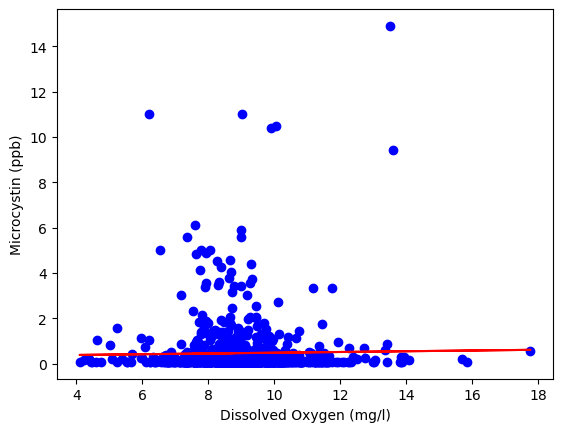

In [616]:
plt.scatter(train.do_mg_l, train.mc_ppb,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Dissolved Oxygen (mg/l)")
plt.ylabel("Microcystin (ppb)")

## Multiple Linear Regression

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['do_mg_l','water_temp_cel_s']])
y = np.asanyarray(train[['mc_ppb']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.04028494 0.01161422]]


In [26]:
y_hat= regr.predict(test[['do_mg_l','water_temp_cel_s']])
x = np.asanyarray(test[['do_mg_l','water_temp_cel_s']])
y = np.asanyarray(test[['mc_ppb']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1.20
Variance score: -0.02


Best possible score is 1.0, so this did not work well

## K Means Clustering

In [357]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [499]:
clean_df_lin.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s
1,8.75,-2.590267,28.83
2,7.27,-2.590267,25.21
3,8.55,-2.590267,25.10
4,9.30,-2.590267,28.77
5,13.83,-2.590267,22.40


In [334]:
from sklearn.preprocessing import StandardScaler
X = clean_df_lin.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-3.47614335e-01,  1.28200623e+00,  1.19561532e+00],
       [-3.47614335e-01,  3.75942036e-02, -9.96922019e-01],
       [-3.47614335e-01, -2.19421422e-04, -9.96922019e-01],
       ...,
       [-3.47614335e-01, -2.40851580e-01, -9.96922019e-01],
       [-3.47614335e-01,  8.52305942e-01,  1.19561532e+00],
       [ 1.40078828e-01, -5.15859762e-01, -9.96922019e-01]])

In [335]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 2 ... 2 1 2]


In [336]:
clean_df_lin["Clus_km"] = labels
clean_df_lin.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s,Clus_km
1,8.75,0.075,28.83,1
2,7.27,0.075,25.21,2
3,8.55,0.075,25.10,2
4,9.30,0.075,28.77,1
5,13.83,0.075,22.40,0


In [337]:
clean_df_lin.groupby('Clus_km').mean()

,do_mg_l,mc_ppb,water_temp_cel_s
Clus_km,,,
0,9.346912,0.271296,21.859193
1,8.674951,0.296853,27.831225
2,8.778462,0.303775,25.266844
3,9.835926,0.115926,14.904444
4,8.657857,5.257000,25.118810


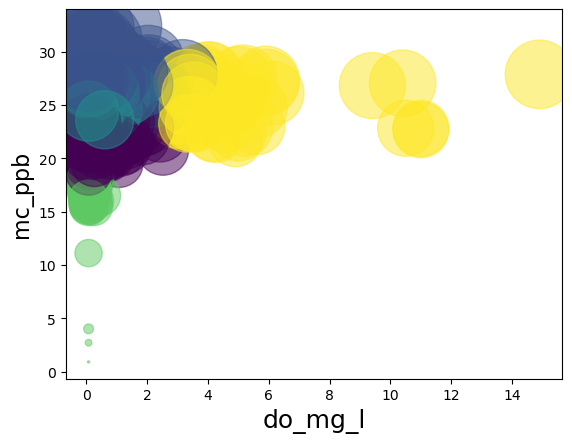

In [338]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('do_mg_l', fontsize=18)
plt.ylabel('mc_ppb', fontsize=16)

plt.show()

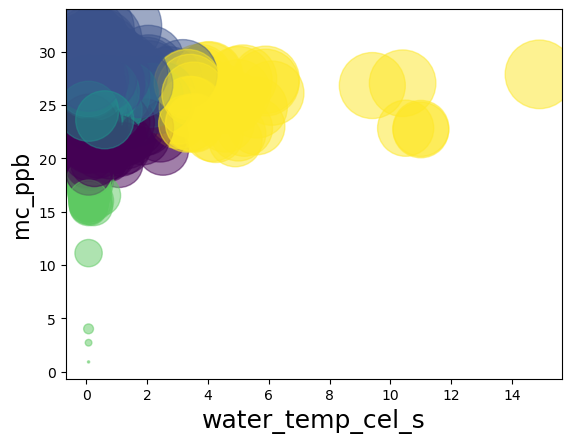

In [339]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('water_temp_cel_s', fontsize=18)
plt.ylabel('mc_ppb', fontsize=16)

plt.show()

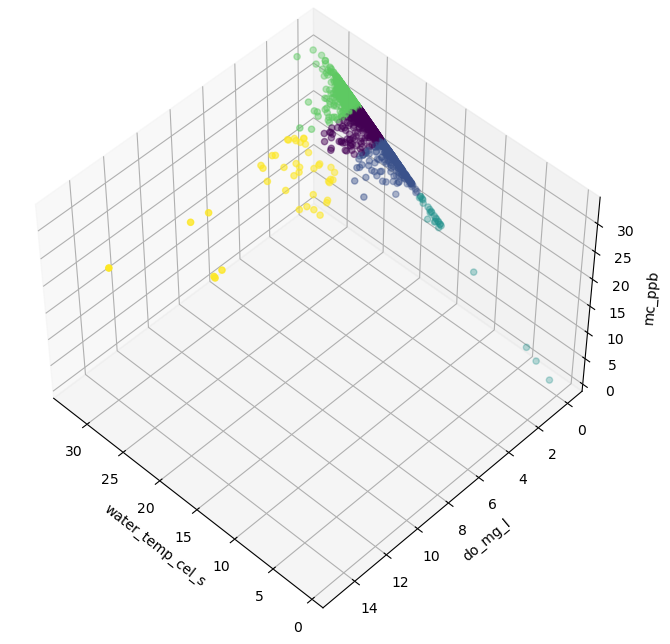

In [35]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('water_temp_cel_s')
ax.set_ylabel('do_mg_l')
ax.set_zlabel('mc_ppb')

ax.scatter(X[:, 1], X[:, 0], X[:, 1], c= labels.astype(np.float))

### Add more variables to K-means

In [429]:
clean_df_k = clean_df[["do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
clean_df_k.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,8.75,0.075,28.83,8.84
2,7.27,0.075,25.21,9.13
3,8.55,0.075,25.10,8.42
4,9.30,0.075,28.77,8.53
5,13.83,0.075,22.40,9.14


In [430]:
from sklearn.preprocessing import StandardScaler
X = clean_df_k.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.34506685,  1.31697339,  0.37541048],
       [-0.34506685,  0.03743086,  0.52283493],
       [-0.34506685, -0.00145026,  0.16189921],
       ...,
       [-0.34506685, -0.24887561, -0.1431169 ],
       [-0.34506685,  0.87514241,  0.21781883],
       [ 0.13234861, -0.53164744,  0.05005997]])

In [431]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 2 ... 2 1 2]


In [432]:
clean_df_k["Clus_km"] = labels
clean_df_k.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s,p_h,Clus_km
1,8.75,0.075,28.83,8.84,1
2,7.27,0.075,25.21,9.13,2
3,8.55,0.075,25.10,8.42,2
4,9.30,0.075,28.77,8.53,1
5,13.83,0.075,22.40,9.14,2


In [433]:
clean_df_k.groupby('Clus_km').mean()

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
Clus_km,,,,
0,8.908429,0.350314,26.155714,0.429100
1,8.671304,0.298732,27.170643,8.667321
2,9.035164,0.302588,23.702009,8.495820
3,9.611132,0.169425,19.130755,8.325189
4,8.695250,5.349575,25.164000,8.795500


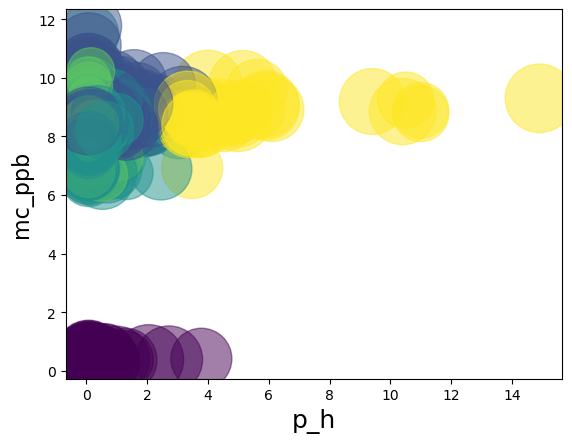

In [434]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('p_h', fontsize=18)
plt.ylabel('mc_ppb', fontsize=16)

plt.show()

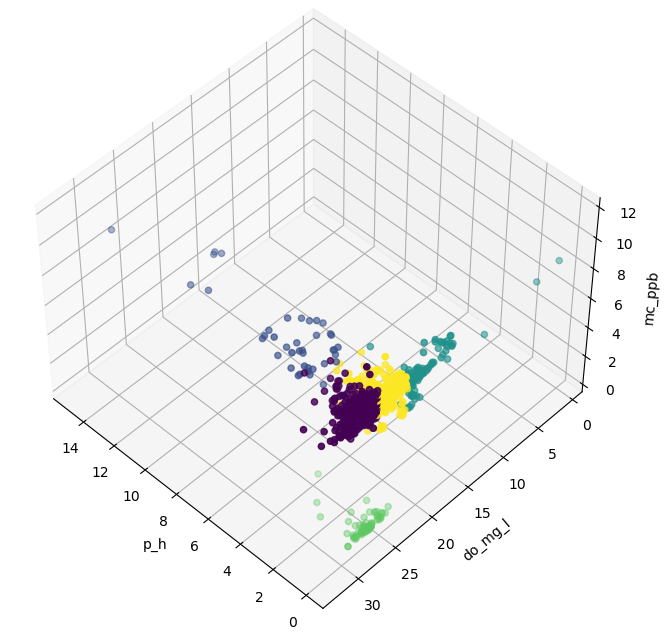

In [412]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('p_h')
ax.set_ylabel('do_mg_l')
ax.set_zlabel('mc_ppb')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))

## Kmeans with Chloro 1, Chloro 2, and Phyco 1 Fluorosense

In [606]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [607]:
clean_df_k = clean_df[['chloro_1_fluorosense', 'phyco_1_fluorosense', "mc_ppb"]].dropna()
clean_df_k

,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
1,20,10.0,0.075
2,21,17.0,0.075
3,16,17.0,0.075
4,9,5.0,0.075
5,10,106.0,0.075
...,...,...,...
2583,1,3.0,0.279
2597,3,6.0,0.075
2607,8,6.0,0.075
2608,7,11.0,0.075


In [608]:
clean_df_k['chloro_1_fluorosense'] = clean_df_k['chloro_1_fluorosense'].astype(float)

In [609]:
clean_df_k.dtypes

chloro_1_fluorosense    float64
phyco_1_fluorosense     float64
mc_ppb                  float64
dtype: object

In [417]:
from sklearn.preprocessing import StandardScaler
X = clean_df_k.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.0551595 , -0.35195135],
       [ 0.49526193, -0.35195135],
       [ 0.49526193, -0.35195135],
       ...,
       [-0.36968604, -0.35195135],
       [ 0.02347213, -0.35195135],
       [-0.36968604, -0.35195135]])

In [418]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 0 1 2 3 0 0 1 0 2 3 1 0 3 3 0 0 3 0 0 1 1 1 0 1 0 1 3 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 0 0 0 3 3 3 3 0 3
 0 3 0 3 3 0 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 3 2 3 0 1 0 0 0 1 0 1 1 1 1 3 0 1 2 3 0 0
 0 0 3 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 3 1 0 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 3 1 1 0 0 1 1 0 1 0 

In [419]:
clean_df_k["Clus_km"] = labels
clean_df_k.head(5)

,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb,Clus_km
1,20.0,10.0,0.075,1
2,21.0,17.0,0.075,0
3,16.0,17.0,0.075,0
4,9.0,5.0,0.075,1
5,10.0,106.0,0.075,2


In [420]:
clean_df_k.groupby('Clus_km').mean()

,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
Clus_km,,,
0,16.833333,17.212963,0.222463
1,6.629820,5.336761,0.342675
2,15.200000,92.400000,0.120400
3,27.941176,39.382353,0.144000


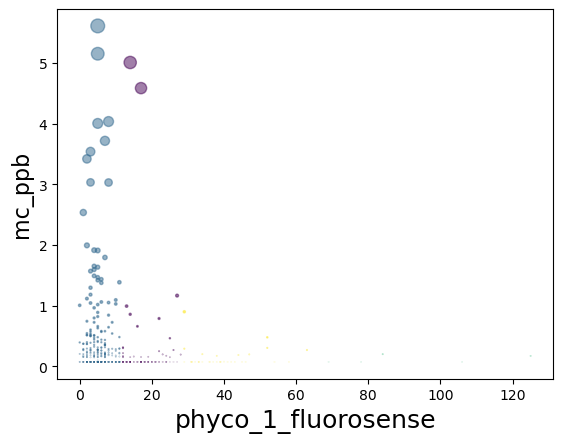

In [421]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('phyco_1_fluorosense', fontsize=18)
plt.ylabel('mc_ppb', fontsize=16)

plt.show()

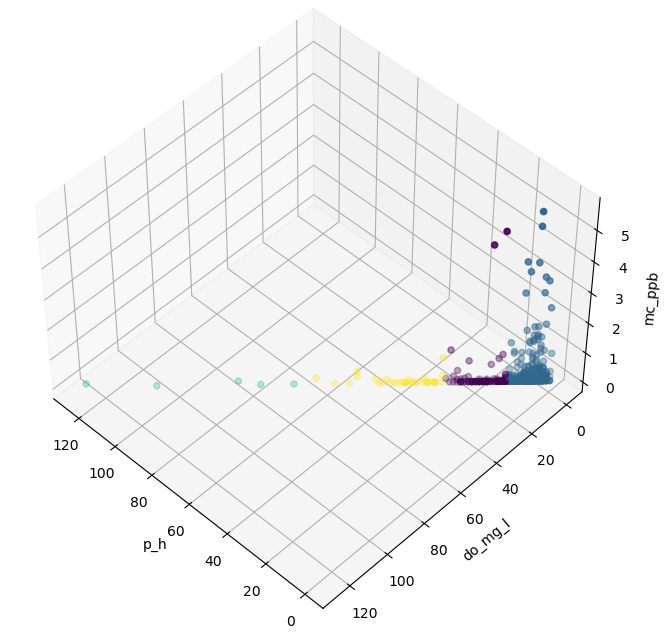

In [427]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('p_h')
ax.set_ylabel('do_mg_l')
ax.set_zlabel('mc_ppb')

ax.scatter(X[:, 0], X[:, 0], X[:, 1], c= labels.astype(np.float))

## K-Means with Chloro and Phyco (Log)

In [588]:
clean_df_k = m_df[['phyco_1_fluorosense', "mc_ppb", "average_depth_ft", 'maximum_depth_ft']].dropna()
clean_df_k

,phyco_1_fluorosense,mc_ppb,average_depth_ft,maximum_depth_ft
1,10.0,0.075,15.6,61
2,17.0,0.075,15.6,61
3,17.0,0.075,15.6,61
4,5.0,0.075,15.6,61
5,106.0,0.075,15.6,61
...,...,...,...,...
20491,37.0,0.075,31.6,67
20496,34.0,0.075,31.6,67
20502,22.0,0.075,31.6,67
20504,33.0,0.075,31.6,67


In [576]:
clean_df_k['chloro_1_fluorosense'] = clean_df_k['chloro_1_fluorosense'].astype(float)

In [577]:
clean_df_k['chloro_1_fluorosense'] = np.log(clean_df_k.chloro_1_fluorosense) + .0001

In [589]:
clean_df_k['phyco_1_fluorosense'] = np.log(clean_df_k.phyco_1_fluorosense) + .0001

In [590]:
clean_df_k['mc_ppb'] = np.log(clean_df_k.mc_ppb) + .0001

In [591]:
clean_df_k['average_depth_ft'] = np.log(clean_df_k.average_depth_ft) + .0001

In [592]:
clean_df_k['maximum_depth_ft'] = np.log(clean_df_k.maximum_depth_ft) + .0001

In [593]:
clean_df_k

,phyco_1_fluorosense,mc_ppb,average_depth_ft,maximum_depth_ft
1,2.302685,-2.590167,2.747371,4.110974
2,2.833313,-2.590167,2.747371,4.110974
3,2.833313,-2.590167,2.747371,4.110974
4,1.609538,-2.590167,2.747371,4.110974
5,4.663539,-2.590167,2.747371,4.110974
...,...,...,...,...
20491,3.611018,-2.590167,3.453257,4.204793
20496,3.526461,-2.590167,3.453257,4.204793
20502,3.091142,-2.590167,3.453257,4.204793
20504,3.496608,-2.590167,3.453257,4.204793


In [594]:
from sklearn.preprocessing import StandardScaler
X = clean_df_k.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.67614086, -0.44553219,  0.13897179],
       [-0.67614086, -0.44553219,  0.13897179],
       [-0.67614086, -0.44553219,  0.13897179],
       ...,
       [-0.67614086,  1.42693907,  0.38552586],
       [-0.67614086,  1.42693907,  0.38552586],
       [-0.67614086,  1.42693907,  0.38552586]])

In [595]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 2 2 2 0 3 3 3 3 3 3 3 3 3 3 0 2 3 3 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3 3 3 0 3 3 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 3 3
 0 3 0 2 2 2 2 2 2 2 2 2 3 2 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0
 3 3 0 3 2 2 0 0 0 2 0 0 3 0 0 2 0 0 3 2 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3
 0 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 3 0 0 0 0 3 0 3 0 3 3 0 0 0 0 0 0 3 3 0 0 3 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 2 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 1 0 0 0 0 2 0 2 2 2 0 0
 2 1 1 0 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 3 0 3 3 0 0
 0 3 3 3 0 0 0 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [596]:
clean_df_k["Clus_km"] = labels
clean_df_k.head(5)

,phyco_1_fluorosense,mc_ppb,average_depth_ft,maximum_depth_ft,Clus_km
1,2.302685,-2.590167,2.747371,4.110974,3
2,2.833313,-2.590167,2.747371,4.110974,3
3,2.833313,-2.590167,2.747371,4.110974,3
4,1.609538,-2.590167,2.747371,4.110974,3
5,4.663539,-2.590167,2.747371,4.110974,3


In [597]:
clean_df_k.groupby('Clus_km').mean()

,phyco_1_fluorosense,mc_ppb,average_depth_ft,maximum_depth_ft
Clus_km,,,,
0,NaN,-1.330017,2.784168,3.995251
1,NaN,-2.531382,3.436786,4.419072
2,NaN,0.383498,2.809664,4.092827
3,NaN,-2.588101,2.647104,3.817842


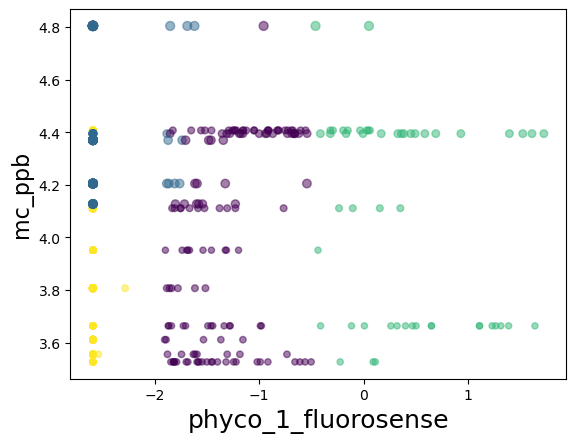

In [599]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('phyco_1_fluorosense', fontsize=18)
plt.ylabel('mc_ppb', fontsize=16)

plt.show()

## K-Means with Max and Average Depth

In [501]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [511]:
mdf = m_df[["do_mg_l", "mc_ppb", "water_temp_cel_s", "average_depth_ft", "maximum_depth_ft"]].dropna()
mdf.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s,average_depth_ft,maximum_depth_ft
1,8.75,0.075,28.83,15.6,61
2,7.27,0.075,25.21,15.6,61
3,8.55,0.075,25.10,15.6,61
4,9.30,0.075,28.77,15.6,61
5,13.83,0.075,22.40,15.6,61


In [512]:
mdf['mc_ppb'] = np.log(mdf.mc_ppb)
mdf

,do_mg_l,mc_ppb,water_temp_cel_s,average_depth_ft,maximum_depth_ft
1,8.75,-2.590267,28.83,15.6,61
2,7.27,-2.590267,25.21,15.6,61
3,8.55,-2.590267,25.10,15.6,61
4,9.30,-2.590267,28.77,15.6,61
5,13.83,-2.590267,22.40,15.6,61
...,...,...,...,...,...
20505,11.04,-2.590267,22.71,31.6,67
20506,8.10,-2.590267,20.07,31.6,67
20507,9.11,-2.590267,19.44,31.6,67
20508,9.87,-2.590267,24.11,31.6,67


In [513]:
mdf['do_mg_l'] = np.log(mdf.do_mg_l)
mdf['water_temp_cel_s'] = np.log(mdf.water_temp_cel_s)
mdf['average_depth_ft'] = np.log(mdf.average_depth_ft)
mdf['maximum_depth_ft'] = np.log(mdf.maximum_depth_ft)
mdf

,do_mg_l,mc_ppb,water_temp_cel_s,average_depth_ft,maximum_depth_ft
1,2.169054,-2.590267,3.361417,2.747271,4.110874
2,1.983756,-2.590267,3.227241,2.747271,4.110874
3,2.145931,-2.590267,3.222868,2.747271,4.110874
4,2.230014,-2.590267,3.359333,2.747271,4.110874
5,2.626840,-2.590267,3.109061,2.747271,4.110874
...,...,...,...,...,...
20505,2.401525,-2.590267,3.122805,3.453157,4.204693
20506,2.091864,-2.590267,2.999226,3.453157,4.204693
20507,2.209373,-2.590267,2.967333,3.453157,4.204693
20508,2.289500,-2.590267,3.182627,3.453157,4.204693


In [517]:
from sklearn.preprocessing import StandardScaler
X = mdf.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.77951402,  0.87018084, -0.47684163,  0.12109216],
       [-0.77951402,  0.08860329, -0.47684163,  0.12109216],
       [-0.77951402,  0.06313106, -0.47684163,  0.12109216],
       ...,
       [-0.77951402, -1.42536761,  1.38178882,  0.36823621],
       [-0.77951402, -0.17127477,  1.38178882,  0.36823621],
       [ 1.04139577, -0.29581374,  1.38178882,  0.36823621]])

In [535]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 3 3 2]


In [536]:
mdf["Clus_km"] = labels
mdf.head(5)

,do_mg_l,mc_ppb,water_temp_cel_s,average_depth_ft,maximum_depth_ft,Clus_km
1,2.169054,-2.590267,3.361417,2.747271,4.110874,0
2,1.983756,-2.590267,3.227241,2.747271,4.110874,0
3,2.145931,-2.590267,3.222868,2.747271,4.110874,0
4,2.230014,-2.590267,3.359333,2.747271,4.110874,0
5,2.626840,-2.590267,3.109061,2.747271,4.110874,0


In [537]:
mdf.groupby('Clus_km').mean()

,do_mg_l,mc_ppb,water_temp_cel_s,average_depth_ft,maximum_depth_ft
Clus_km,,,,,
0,2.173927,-2.589234,3.213560,2.648713,3.836599
1,2.147984,1.104518,3.230815,2.878521,4.074535
2,2.172393,-0.342549,3.238089,2.851596,4.092633
3,2.188888,-2.527466,3.169536,3.427454,4.419378
4,2.158320,-1.470735,3.230596,2.825644,3.960675


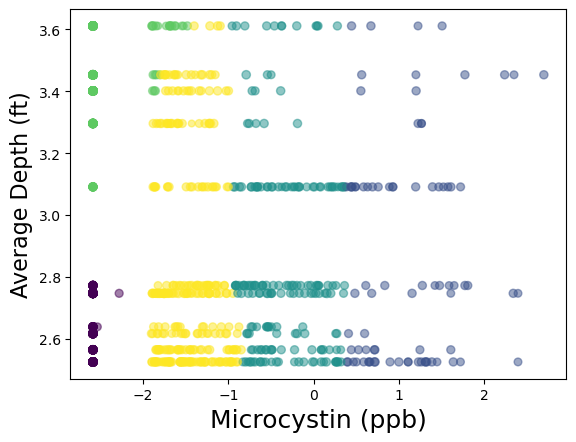

In [541]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Microcystin (ppb)', fontsize=18)
plt.ylabel('Average Depth (ft)', fontsize=16)

plt.show()

## Hierarchical Clustering

In [455]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [456]:
print(type(pdf.date[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [457]:
pdf = clean_df[["lake_name", "date", "do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
pdf.head(5)

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
2,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
3,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
4,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
5,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14


In [458]:
pdf = clean_df[["lake_name", "date", "do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
pdf.head(5)

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
2,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
3,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
4,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
5,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14


In [459]:
featureset = clean_df[["do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
featureset.head(5)
featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,8.75,0.075,28.83,8.84
2,7.27,0.075,25.21,9.13
3,8.55,0.075,25.10,8.42
4,9.30,0.075,28.77,8.53
5,13.83,0.075,22.40,9.14
...,...,...,...,...
2611,8.90,0.270,19.60,8.41
2617,6.96,0.075,23.30,7.65
2620,7.61,0.075,24.40,7.82
2621,9.44,0.075,27.58,8.53


In [460]:
pdf = pdf.reset_index(drop=True)
pdf

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
0,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
1,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
2,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
3,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
4,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14
...,...,...,...,...,...,...
1199,Wawasee,9/23/2020,8.90,0.270,19.60,8.41
1200,Webster,9/10/2012,6.96,0.075,23.30,7.65
1201,Winona,9/10/2012,7.61,0.075,24.40,7.82
1202,Winona,7/20/2016,9.44,0.075,27.58,8.53


In [461]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.34040996, 0.        , 0.88666667, 0.74446189],
       [0.23206442, 0.        , 0.77174603, 0.76975406],
       [0.32576867, 0.        , 0.76825397, 0.70783185],
       [0.3806735 , 0.        , 0.8847619 , 0.71742543],
       [0.71229868, 0.        , 0.68253968, 0.7706262 ]])

In [462]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.15995375, 0.12481063, ..., 0.18616288, 0.06969348,
        0.19889444],
       [0.15995375, 0.        , 0.1123701 , ..., 0.11972468, 0.18339824,
        0.10454444],
       [0.12481063, 0.1123701 , 0.        , ..., 0.08926078, 0.1026425 ,
        0.09579151],
       ...,
       [0.18616288, 0.11972468, 0.08926078, ..., 0.        , 0.17881027,
        0.05517708],
       [0.06969348, 0.18339824, 0.1026425 , ..., 0.17881027, 0.        ,
        0.19241026],
       [0.19889444, 0.10454444, 0.09579151, ..., 0.05517708, 0.19241026,
        0.        ]])

In [463]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [464]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 8, 11, 14, ..., 16,  7, 16], dtype=int32)

In [465]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [466]:
pdf.iloc[1197]

lake_name              Wawasee
date                11/12/2020
do_mg_l                  10.03
mc_ppb                   0.075
water_temp_cel_s          11.1
p_h                        7.6
Name: 1197, dtype: object

In [498]:
fig = pylab.figure(figsize=(18,200))
def llf(id):
    return '[%s %s]' % (pdf['lake_name'][id], (pdf['date'][id]))
    
#dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<Figure size 1800x20000 with 0 Axes>

## Data in 2018

In [268]:
pdf = clean_df[["lake_name", "date", "do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
pdf.head(5)

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
2,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
3,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
4,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
5,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14


In [269]:
pdf['date'] = pd.to_datetime(pdf['date'])
pdf['date'] = pd.to_datetime(pdf['date'],format='%Y-%m-%d')
filtered_pdf = pdf.query("date >= '2018-01-01' \
                       and date < '2018-12-31'")
print(type(pdf.date[1]))
filtered_pdf

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,2018-07-09,8.75,0.075,28.83,8.84
2,Beaver Dam,2018-07-23,7.27,0.075,25.21,9.13
3,Beaver Dam,2018-07-31,8.55,0.075,25.10,8.42
4,Beaver Dam,2018-08-06,9.30,0.075,28.77,8.53
11,Beaver Dam,2018-06-11,11.01,0.174,23.36,8.90
...,...,...,...,...,...,...
1213,Yellow Creek,2018-07-31,9.25,0.075,25.12,8.53
1214,Yellow Creek,2018-08-06,8.92,0.075,28.08,8.59
1224,Yellow Creek,2018-06-25,9.23,0.199,24.70,8.86
1225,Yellow Creek,2018-06-11,9.17,0.203,23.20,8.97


In [270]:
filtered_pdf = filtered_pdf.reset_index(drop=True)
filtered_pdf

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
0,Beaver Dam,2018-07-09,8.75,0.075,28.83,8.84
1,Beaver Dam,2018-07-23,7.27,0.075,25.21,9.13
2,Beaver Dam,2018-07-31,8.55,0.075,25.10,8.42
3,Beaver Dam,2018-08-06,9.30,0.075,28.77,8.53
4,Beaver Dam,2018-06-11,11.01,0.174,23.36,8.90
...,...,...,...,...,...,...
105,Yellow Creek,2018-07-31,9.25,0.075,25.12,8.53
106,Yellow Creek,2018-08-06,8.92,0.075,28.08,8.59
107,Yellow Creek,2018-06-25,9.23,0.199,24.70,8.86
108,Yellow Creek,2018-06-11,9.17,0.203,23.20,8.97


In [271]:
filtered_featureset = filtered_pdf.drop(['lake_name', 'date'], axis=1)
filtered_featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
0,8.75,0.075,28.83,8.84
1,7.27,0.075,25.21,9.13
2,8.55,0.075,25.10,8.42
3,9.30,0.075,28.77,8.53
4,11.01,0.174,23.36,8.90
...,...,...,...,...
105,9.25,0.075,25.12,8.53
106,8.92,0.075,28.08,8.59
107,9.23,0.199,24.70,8.86
108,9.17,0.203,23.20,8.97


In [272]:
filtered_featureset = filtered_featureset.reset_index(drop=True)
filtered_featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
0,8.75,0.075,28.83,8.84
1,7.27,0.075,25.21,9.13
2,8.55,0.075,25.10,8.42
3,9.30,0.075,28.77,8.53
4,11.01,0.174,23.36,8.90
...,...,...,...,...
105,9.25,0.075,25.12,8.53
106,8.92,0.075,28.08,8.59
107,9.23,0.199,24.70,8.86
108,9.17,0.203,23.20,8.97


In [280]:
from sklearn.preprocessing import MinMaxScaler
x = filtered_featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.4535865 , 0.        , 0.84943538, 0.36909871],
       [0.29746835, 0.        , 0.39523212, 0.49356223],
       [0.43248945, 0.        , 0.38143036, 0.1888412 ],
       [0.51160338, 0.        , 0.84190715, 0.2360515 ],
       [0.69198312, 0.02008114, 0.16311167, 0.39484979]])

In [281]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.49614982, 0.5019627 , ..., 0.52133887, 0.71045721,
        0.14011796],
       [0.49614982, 0.        , 0.33358071, ..., 0.24678225, 0.3303956 ,
        0.48085033],
       [0.5019627 , 0.33358071, 0.        , ..., 0.20966085, 0.34278765,
        0.56609986],
       ...,
       [0.52133887, 0.24678225, 0.20966085, ..., 0.        , 0.19414155,
        0.56406575],
       [0.71045721, 0.3303956 , 0.34278765, ..., 0.19414155, 0.        ,
        0.7406183 ],
       [0.14011796, 0.48085033, 0.56609986, ..., 0.56406575, 0.7406183 ,
        0.        ]])

In [282]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [283]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 7, 4, 6, 5, 6, 4, 6, 5, 6, 4, 7, 5, 5, 6, 7, 7, 4, 6, 7, 7, 5,
       5, 7, 4, 7, 5, 5, 7, 5, 5, 5, 5, 7, 6, 7, 6, 7, 4, 5, 6, 7, 7, 4,
       7, 5, 5, 5, 5, 6, 2, 6, 5, 7, 5, 5, 7, 5, 7, 7, 5, 7, 3, 6, 4, 7,
       5, 6, 5, 5, 6, 5, 7, 7, 4, 7, 6, 5, 5, 7, 4, 5, 6, 7, 1, 1, 1, 5,
       6, 6, 4, 7, 5, 5, 5, 5, 6, 4, 7, 7, 5, 7, 6, 6, 7, 4, 7, 4, 5, 6],
      dtype=int32)

In [284]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 4, 5, 5, 3, 4, 5, 5, 3,
       3, 5, 3, 5, 3, 3, 5, 3, 3, 3, 3, 5, 4, 5, 4, 5, 3, 3, 4, 5, 5, 3,
       5, 3, 3, 3, 3, 4, 2, 4, 3, 5, 3, 3, 5, 3, 5, 5, 3, 5, 2, 4, 3, 5,
       3, 4, 3, 3, 4, 3, 5, 5, 3, 5, 4, 3, 3, 5, 3, 3, 4, 5, 1, 1, 1, 3,
       4, 4, 3, 5, 3, 3, 3, 3, 4, 3, 5, 5, 3, 5, 4, 4, 5, 3, 5, 3, 3, 4],
      dtype=int32)

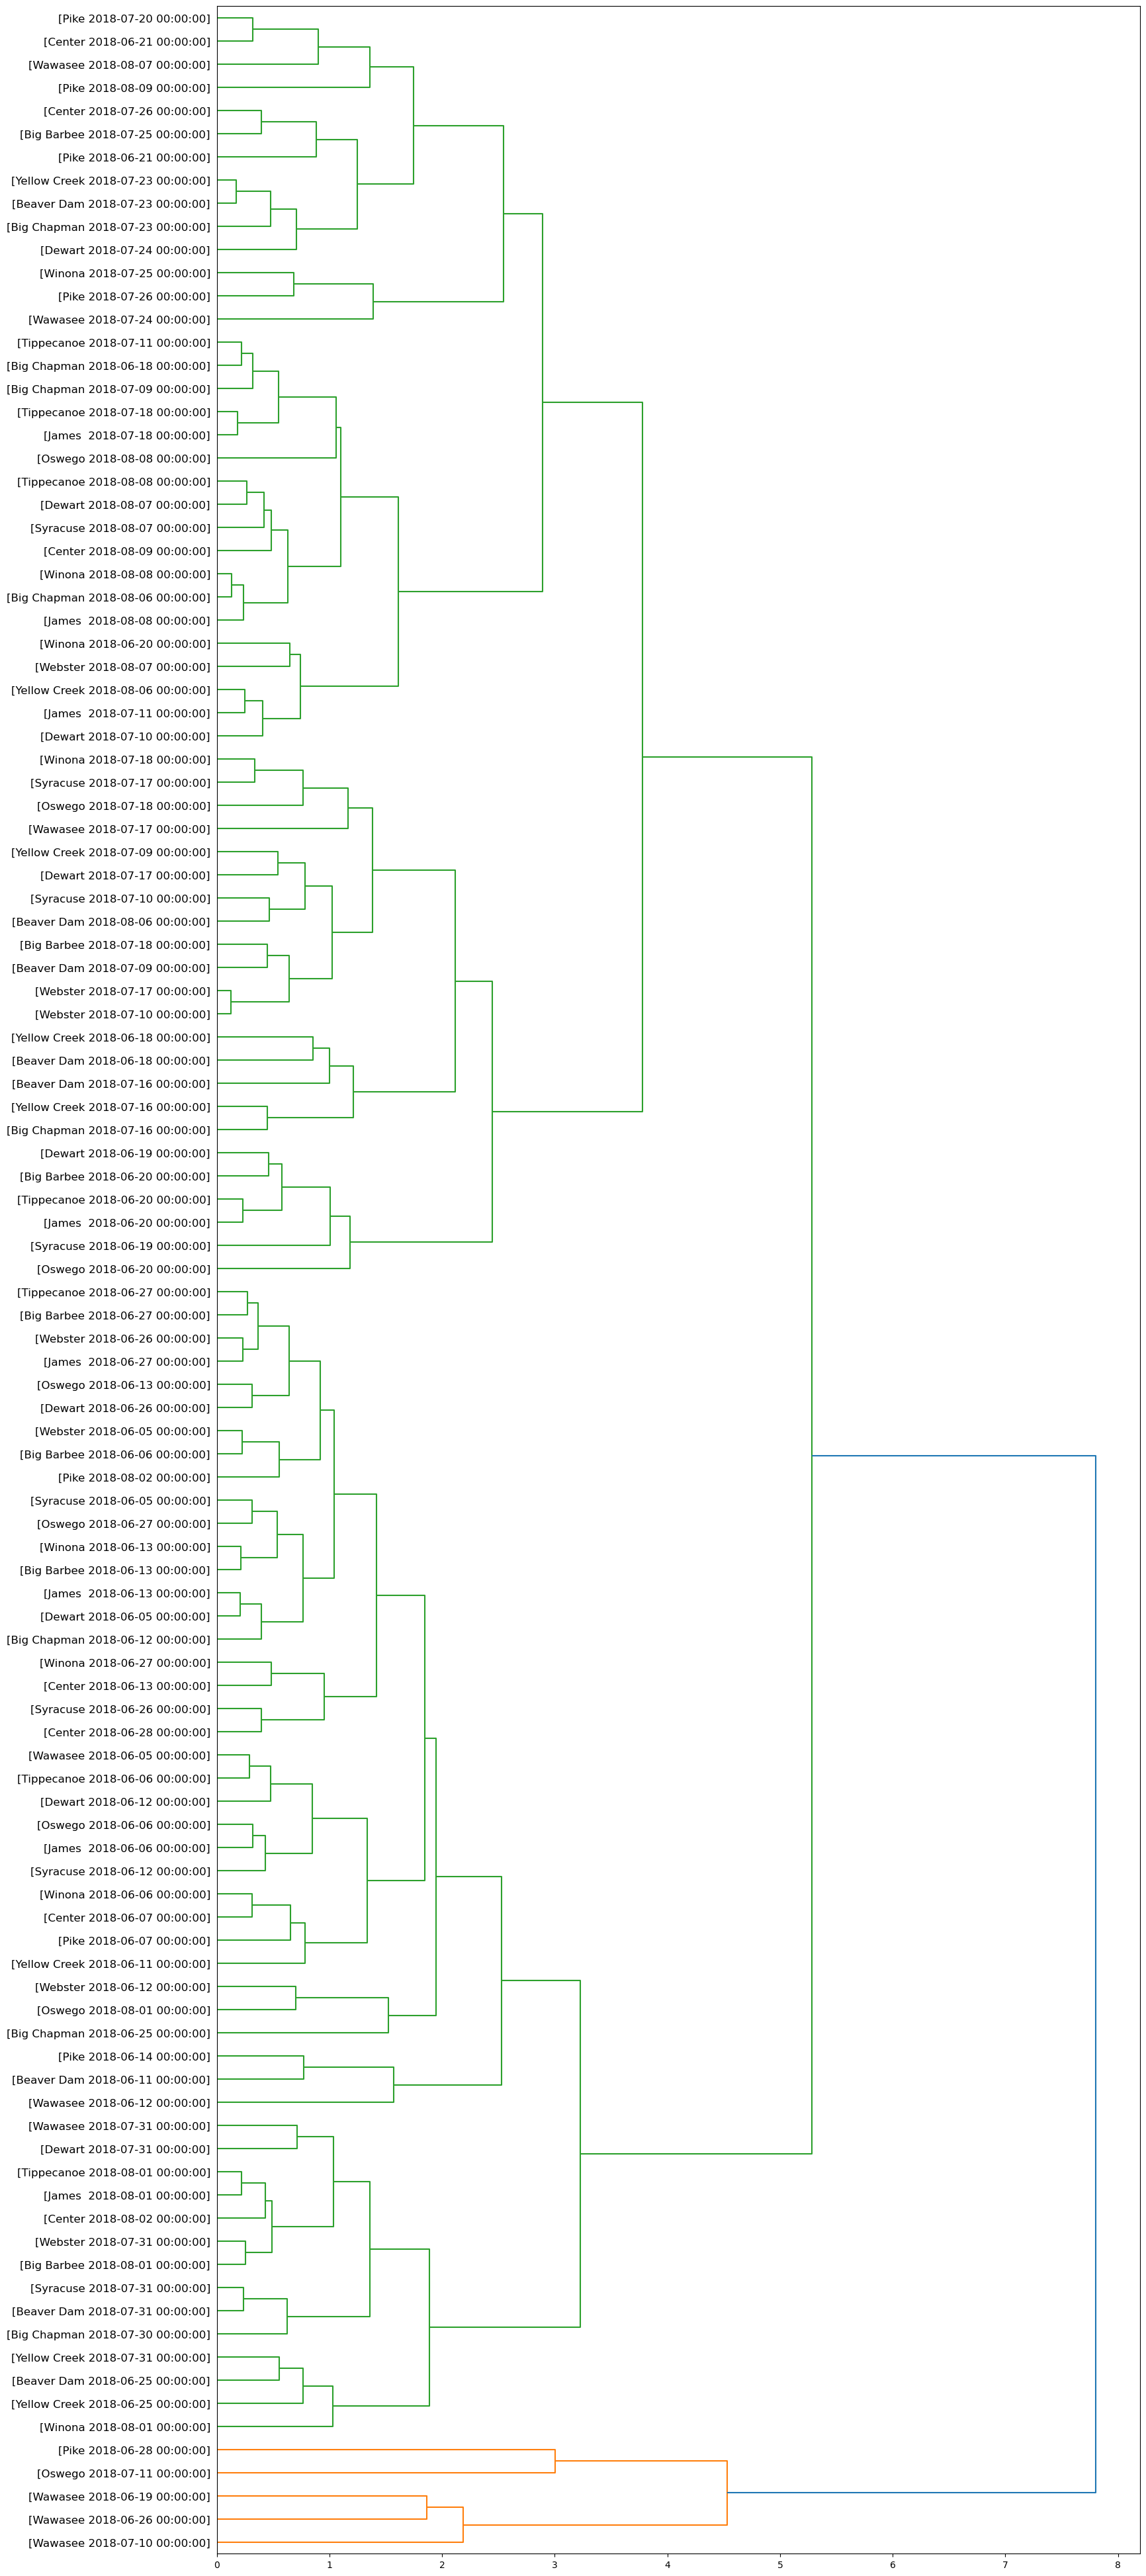

In [285]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (filtered_pdf['lake_name'][id], (filtered_pdf['date'][id]))
    
dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Sorting By Months

In [493]:
print(type(pdf.date[1]))

<class 'str'>


In [494]:
pdf['date'] = pd.to_datetime(pdf['date'])
pdf['date'] = pd.to_datetime(pdf['date'],format='%Y-%m-%d')
#filtered_pdf = pdf.query("date >= '2012-01-01' \
                       #and date < '2012-12-31'")
print(type(pdf.date[1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [495]:
pdf = pdf.resample('M', on='date').mean()
print(pdf)

             do_mg_l    mc_ppb  water_temp_cel_s       p_h
date                                                      
2011-05-31  9.700000  0.131000         16.630000  8.589000
2011-06-30  9.328889  1.055556         23.144444  8.711111
2011-07-31  8.774545  1.364091         27.927273  8.780909
2011-08-31  9.010909  0.203636         26.045455  8.783636
2011-09-30  9.376364  0.167727         21.718182  8.788182
...              ...       ...               ...       ...
2021-04-30       NaN       NaN               NaN       NaN
2021-05-31  9.362500  0.811500         20.575000  8.535000
2021-06-30  9.637879  0.305848         24.128788  8.451515
2021-07-31  9.365965  0.507772         26.270175  2.536772
2021-08-31  8.439643  0.226286         26.307143  0.427893

[124 rows x 4 columns]


In [496]:
pdf['date'] = pdf.index.values
pdf

,do_mg_l,mc_ppb,water_temp_cel_s,p_h,date
date,,,,,
2011-05-31,9.700000,0.131000,16.630000,8.589000,2011-05-31
2011-06-30,9.328889,1.055556,23.144444,8.711111,2011-06-30
2011-07-31,8.774545,1.364091,27.927273,8.780909,2011-07-31
2011-08-31,9.010909,0.203636,26.045455,8.783636,2011-08-31
2011-09-30,9.376364,0.167727,21.718182,8.788182,2011-09-30
...,...,...,...,...,...
2021-04-30,NaN,NaN,NaN,NaN,2021-04-30
2021-05-31,9.362500,0.811500,20.575000,8.535000,2021-05-31
2021-06-30,9.637879,0.305848,24.128788,8.451515,2021-06-30


In [497]:
pdf = pdf.reset_index(drop=True)
pdf

,do_mg_l,mc_ppb,water_temp_cel_s,p_h,date
0,9.700000,0.131000,16.630000,8.589000,2011-05-31
1,9.328889,1.055556,23.144444,8.711111,2011-06-30
2,8.774545,1.364091,27.927273,8.780909,2011-07-31
3,9.010909,0.203636,26.045455,8.783636,2011-08-31
4,9.376364,0.167727,21.718182,8.788182,2011-09-30
...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,2021-04-30
120,9.362500,0.811500,20.575000,8.535000,2021-05-31
121,9.637879,0.305848,24.128788,8.451515,2021-06-30
122,9.365965,0.507772,26.270175,2.536772,2021-07-31


In [235]:
featureset = clean_df[["do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
featureset.head(5)
featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,8.75,0.075,28.83,8.84
2,7.27,0.075,25.21,9.13
3,8.55,0.075,25.10,8.42
4,9.30,0.075,28.77,8.53
5,13.83,0.075,22.40,9.14
...,...,...,...,...
2611,8.90,0.270,19.60,8.41
2617,6.96,0.075,23.30,7.65
2620,7.61,0.075,24.40,7.82
2621,9.44,0.075,27.58,8.53


In [239]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.34040996, 0.        , 0.88666667, 0.74446189],
       [0.23206442, 0.        , 0.77174603, 0.76975406],
       [0.32576867, 0.        , 0.76825397, 0.70783185],
       [0.3806735 , 0.        , 0.8847619 , 0.71742543],
       [0.71229868, 0.        , 0.68253968, 0.7706262 ]])

In [237]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

ValueError: array must not contain infs or NaNs

In [231]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [232]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 8, 11, 14, ..., 16,  7, 16], dtype=int32)

In [233]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [294]:
fig = pylab.figure(figsize=(18,200))
def llf(id):
    return '[%s]' % (pdf['date'][id])
    
#dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<Figure size 1800x20000 with 0 Axes>

## Clustering with SciKitLearn

In [90]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.15995375 0.12481063 ... 0.18616288 0.06969348 0.19889444]
 [0.15995375 0.         0.1123701  ... 0.11972468 0.18339824 0.10454444]
 [0.12481063 0.1123701  0.         ... 0.08926078 0.1026425  0.09579151]
 ...
 [0.18616288 0.11972468 0.08926078 ... 0.         0.17881027 0.05517708]
 [0.06969348 0.18339824 0.1026425  ... 0.17881027 0.         0.19241026]
 [0.19889444 0.10454444 0.09579151 ... 0.05517708 0.19241026 0.        ]]


In [91]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [92]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [93]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,lake_name,do_mg_l,mc_ppb,water_temp_cel_s,p_h,cluster_
1,Beaver Dam,8.75,0.075,28.83,8.84,4
2,Beaver Dam,7.27,0.075,25.21,9.13,4
3,Beaver Dam,8.55,0.075,25.10,8.42,4
4,Beaver Dam,9.30,0.075,28.77,8.53,4
5,Beaver Dam,13.83,0.075,22.40,9.14,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mc_ppb')

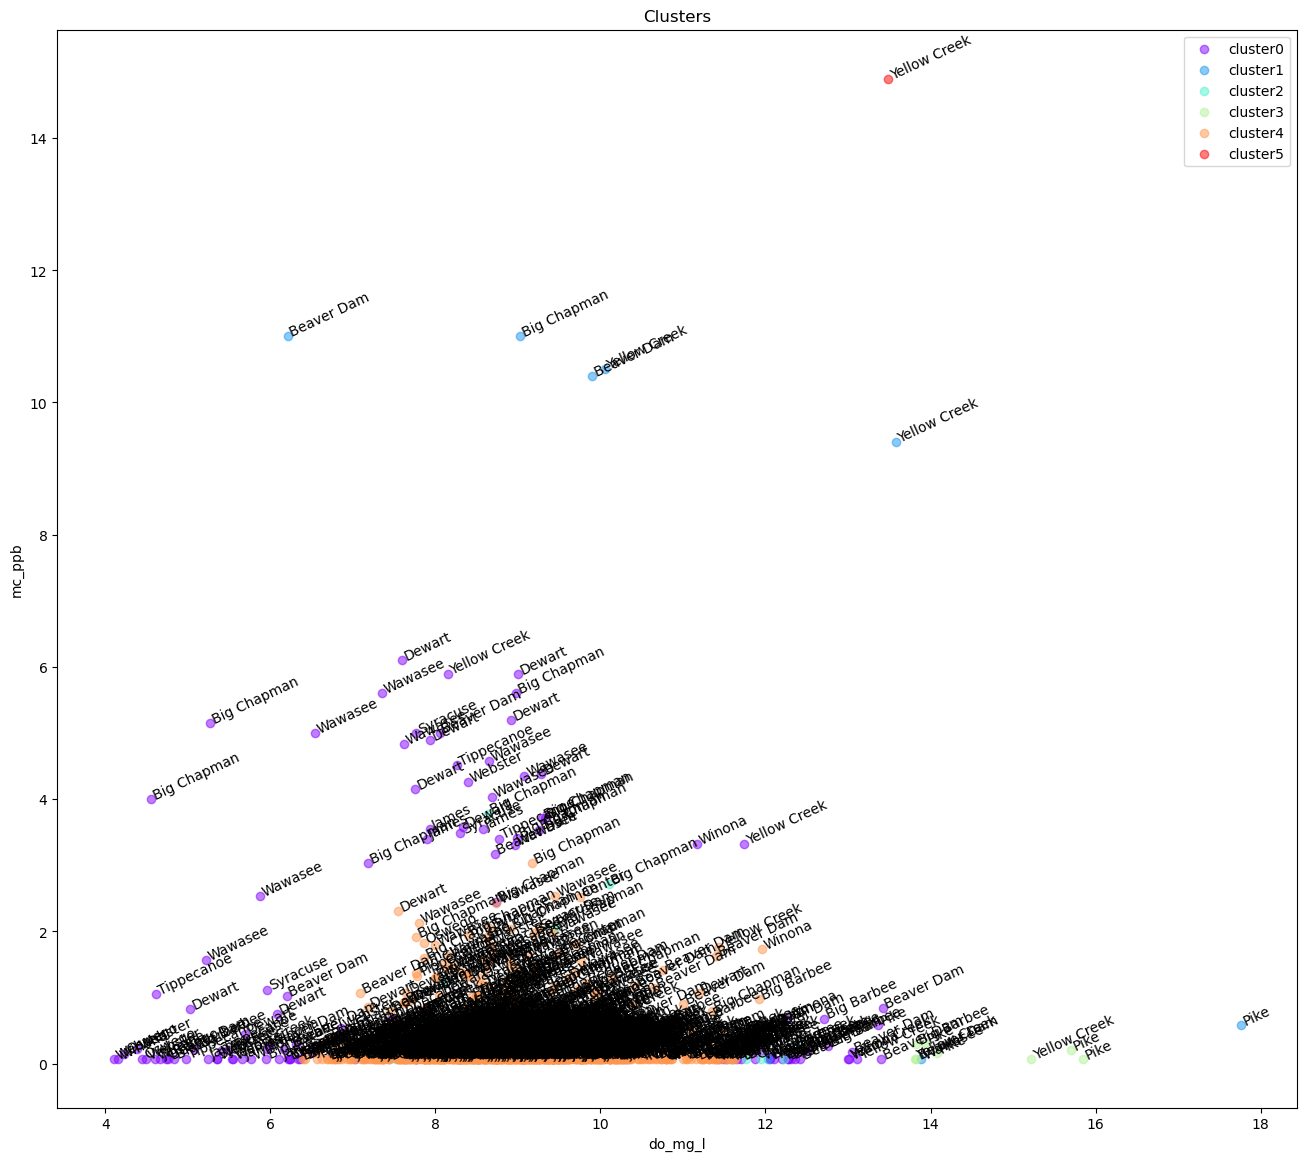

In [97]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.do_mg_l[i], subset.mc_ppb[i],str(subset['lake_name'][i]), rotation=25) 
    plt.scatter(subset.do_mg_l, subset.mc_ppb, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('do_mg_l')
plt.ylabel('mc_ppb')

### Want to look into splitting up by years

In [19]:
from datetime import datetime
clean_df['date'] = pd.to_datetime(clean_df['date'], format='%m/%d/%Y')

In [20]:
clean_df

,lake_name,site_type,id_#,date,time,pw,w,total_depth_m,secchi_depth,depth_m,...,ss,f,notes,quanta_#,weather_meter_#,fluorometer_#,aquafluor_#,van_dorn_#,unnamed_50,unnamed_51
0,Beaver Dam,Open,21221BEA2,2021-08-09,15:40,S,S,18.5,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaver Dam,Open,18190BEA2,2018-07-09,15:00,S,S,18.0,3.0,0.0,...,NaN,NaN,AQUATIC WEED CONTROL SPRAYED IN THE MORNING (7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Beaver Dam,Open,18204BEA2,2018-07-23,15:15,R,R,19.0,5.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beaver Dam,Open,18211BEA2,2018-07-31,15:00,O,O,18.6,4.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beaver Dam,Open,18218BEA2,2018-08-06,14:45,S,O,18.8,4.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24215,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24216,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24217,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24218,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clustering with SciKit 2018

In [295]:
pdf = clean_df[["lake_name", "date", "do_mg_l", "mc_ppb", "water_temp_cel_s", "p_h"]].dropna()
pdf.head(5)

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,7/9/2018,8.75,0.075,28.83,8.84
2,Beaver Dam,7/23/2018,7.27,0.075,25.21,9.13
3,Beaver Dam,7/31/2018,8.55,0.075,25.10,8.42
4,Beaver Dam,8/6/2018,9.30,0.075,28.77,8.53
5,Beaver Dam,6/1/2020,13.83,0.075,22.40,9.14


In [296]:
pdf['date'] = pd.to_datetime(pdf['date'])
pdf['date'] = pd.to_datetime(pdf['date'],format='%Y-%m-%d')
filtered_pdf = pdf.query("date >= '2018-01-01' \
                       and date < '2018-12-31'")
print(type(pdf.date[1]))
filtered_pdf

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,Beaver Dam,2018-07-09,8.75,0.075,28.83,8.84
2,Beaver Dam,2018-07-23,7.27,0.075,25.21,9.13
3,Beaver Dam,2018-07-31,8.55,0.075,25.10,8.42
4,Beaver Dam,2018-08-06,9.30,0.075,28.77,8.53
11,Beaver Dam,2018-06-11,11.01,0.174,23.36,8.90
...,...,...,...,...,...,...
1213,Yellow Creek,2018-07-31,9.25,0.075,25.12,8.53
1214,Yellow Creek,2018-08-06,8.92,0.075,28.08,8.59
1224,Yellow Creek,2018-06-25,9.23,0.199,24.70,8.86
1225,Yellow Creek,2018-06-11,9.17,0.203,23.20,8.97


In [297]:
filtered_featureset = filtered_pdf.drop(['lake_name', 'date'], axis=1)
filtered_featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
1,8.75,0.075,28.83,8.84
2,7.27,0.075,25.21,9.13
3,8.55,0.075,25.10,8.42
4,9.30,0.075,28.77,8.53
11,11.01,0.174,23.36,8.90
...,...,...,...,...
1213,9.25,0.075,25.12,8.53
1214,8.92,0.075,28.08,8.59
1224,9.23,0.199,24.70,8.86
1225,9.17,0.203,23.20,8.97


In [298]:
filtered_featureset = filtered_featureset.reset_index(drop=True)
filtered_featureset

,do_mg_l,mc_ppb,water_temp_cel_s,p_h
0,8.75,0.075,28.83,8.84
1,7.27,0.075,25.21,9.13
2,8.55,0.075,25.10,8.42
3,9.30,0.075,28.77,8.53
4,11.01,0.174,23.36,8.90
...,...,...,...,...
105,9.25,0.075,25.12,8.53
106,8.92,0.075,28.08,8.59
107,9.23,0.199,24.70,8.86
108,9.17,0.203,23.20,8.97


In [299]:
from sklearn.preprocessing import MinMaxScaler
x = filtered_featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.4535865 , 0.        , 0.84943538, 0.36909871],
       [0.29746835, 0.        , 0.39523212, 0.49356223],
       [0.43248945, 0.        , 0.38143036, 0.1888412 ],
       [0.51160338, 0.        , 0.84190715, 0.2360515 ],
       [0.69198312, 0.02008114, 0.16311167, 0.39484979]])

In [300]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.49614982, 0.5019627 , ..., 0.52133887, 0.71045721,
        0.14011796],
       [0.49614982, 0.        , 0.33358071, ..., 0.24678225, 0.3303956 ,
        0.48085033],
       [0.5019627 , 0.33358071, 0.        , ..., 0.20966085, 0.34278765,
        0.56609986],
       ...,
       [0.52133887, 0.24678225, 0.20966085, ..., 0.        , 0.19414155,
        0.56406575],
       [0.71045721, 0.3303956 , 0.34278765, ..., 0.19414155, 0.        ,
        0.7406183 ],
       [0.14011796, 0.48085033, 0.56609986, ..., 0.56406575, 0.7406183 ,
        0.        ]])

In [301]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [302]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 7, 4, 6, 5, 6, 4, 6, 5, 6, 4, 7, 5, 5, 6, 7, 7, 4, 6, 7, 7, 5,
       5, 7, 4, 7, 5, 5, 7, 5, 5, 5, 5, 7, 6, 7, 6, 7, 4, 5, 6, 7, 7, 4,
       7, 5, 5, 5, 5, 6, 2, 6, 5, 7, 5, 5, 7, 5, 7, 7, 5, 7, 3, 6, 4, 7,
       5, 6, 5, 5, 6, 5, 7, 7, 4, 7, 6, 5, 5, 7, 4, 5, 6, 7, 1, 1, 1, 5,
       6, 6, 4, 7, 5, 5, 5, 5, 6, 4, 7, 7, 5, 7, 6, 6, 7, 4, 7, 4, 5, 6],
      dtype=int32)

In [303]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 4, 5, 5, 3, 4, 5, 5, 3,
       3, 5, 3, 5, 3, 3, 5, 3, 3, 3, 3, 5, 4, 5, 4, 5, 3, 3, 4, 5, 5, 3,
       5, 3, 3, 3, 3, 4, 2, 4, 3, 5, 3, 3, 5, 3, 5, 5, 3, 5, 2, 4, 3, 5,
       3, 4, 3, 3, 4, 3, 5, 5, 3, 5, 4, 3, 3, 5, 3, 3, 4, 5, 1, 1, 1, 3,
       4, 4, 3, 5, 3, 3, 3, 3, 4, 3, 5, 5, 3, 5, 4, 4, 5, 3, 5, 3, 3, 4],
      dtype=int32)

In [304]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.49614982 0.5019627  ... 0.52133887 0.71045721 0.14011796]
 [0.49614982 0.         0.33358071 ... 0.24678225 0.3303956  0.48085033]
 [0.5019627  0.33358071 0.         ... 0.20966085 0.34278765 0.56609986]
 ...
 [0.52133887 0.24678225 0.20966085 ... 0.         0.19414155 0.56406575]
 [0.71045721 0.3303956  0.34278765 ... 0.19414155 0.         0.7406183 ]
 [0.14011796 0.48085033 0.56609986 ... 0.56406575 0.7406183  0.        ]]


In [305]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [306]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([4, 2, 5, 4, 1, 4, 5, 4, 1, 4, 5, 2, 1, 1, 4, 2, 2, 5, 4, 2, 2, 1,
       1, 2, 5, 2, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 4, 2, 5, 1, 4, 2, 2, 5,
       2, 1, 1, 1, 1, 4, 0, 4, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 4, 5, 2,
       1, 4, 1, 1, 4, 1, 2, 2, 5, 2, 4, 1, 1, 2, 5, 1, 4, 2, 3, 3, 3, 1,
       4, 4, 5, 2, 1, 1, 1, 1, 4, 5, 2, 2, 1, 2, 4, 4, 2, 5, 2, 5, 1, 4],
      dtype=int64)

In [307]:
filtered_pdf['cluster_'] = agglom.labels_
filtered_pdf.head()

,lake_name,date,do_mg_l,mc_ppb,water_temp_cel_s,p_h,cluster_
1,Beaver Dam,2018-07-09,8.75,0.075,28.83,8.84,4
2,Beaver Dam,2018-07-23,7.27,0.075,25.21,9.13,2
3,Beaver Dam,2018-07-31,8.55,0.075,25.10,8.42,5
4,Beaver Dam,2018-08-06,9.30,0.075,28.77,8.53,4
11,Beaver Dam,2018-06-11,11.01,0.174,23.36,8.90,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mc_ppb')

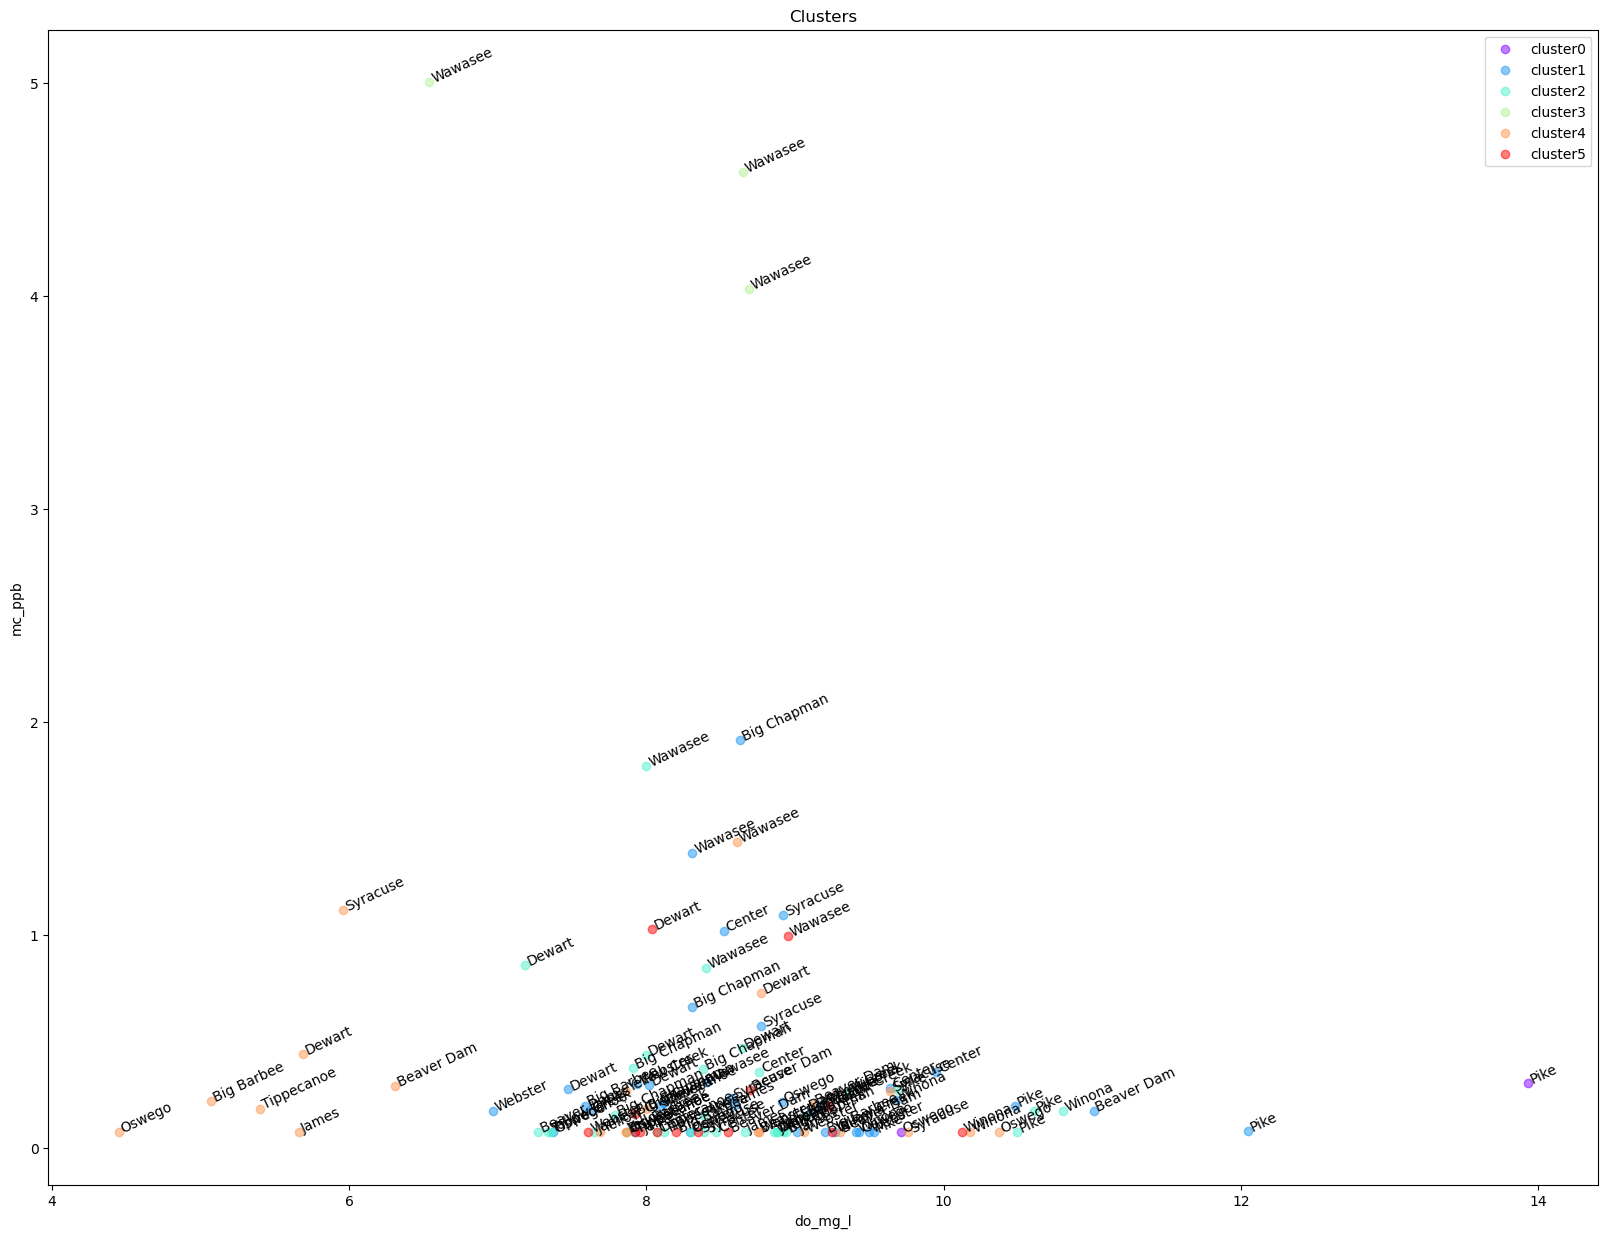

In [311]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(20,15))

for color, label in zip(colors, cluster_labels):
    subset = filtered_pdf[filtered_pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.do_mg_l[i], subset.mc_ppb[i],str(subset['lake_name'][i]), rotation=25) 
    plt.scatter(subset.do_mg_l, subset.mc_ppb, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('do_mg_l')
plt.ylabel('mc_ppb')

## Scikit with Cloro and Phyco in 2018

In [435]:
pdf = clean_df[["lake_name", "date", "chloro_1_fluorosense", "phyco_1_fluorosense", "mc_ppb"]].dropna()
pdf.head(5)

,lake_name,date,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
1,Beaver Dam,7/9/2018,20,10.0,0.075
2,Beaver Dam,7/23/2018,21,17.0,0.075
3,Beaver Dam,7/31/2018,16,17.0,0.075
4,Beaver Dam,8/6/2018,9,5.0,0.075
5,Beaver Dam,6/1/2020,10,106.0,0.075


In [436]:
pdf['date'] = pd.to_datetime(pdf['date'])
pdf['date'] = pd.to_datetime(pdf['date'],format='%Y-%m-%d')
filtered_pdf = pdf.query("date >= '2018-01-01' \
                       and date < '2018-12-31'")
print(type(pdf.date[1]))
filtered_pdf

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,lake_name,date,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
1,Beaver Dam,2018-07-09,20,10.0,0.075
2,Beaver Dam,2018-07-23,21,17.0,0.075
3,Beaver Dam,2018-07-31,16,17.0,0.075
4,Beaver Dam,2018-08-06,9,5.0,0.075
11,Beaver Dam,2018-06-11,15,125.0,0.174
...,...,...,...,...,...
1214,Yellow Creek,2018-08-06,7,6.0,0.075
1223,Yellow Creek,2018-06-04,18,15.0,0.164
1224,Yellow Creek,2018-06-25,12,23.0,0.199
1225,Yellow Creek,2018-06-11,28,84.0,0.203


In [437]:
filtered_featureset = filtered_pdf.drop(['lake_name', 'date'], axis=1)
filtered_featureset

,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
1,20,10.0,0.075
2,21,17.0,0.075
3,16,17.0,0.075
4,9,5.0,0.075
11,15,125.0,0.174
...,...,...,...
1214,7,6.0,0.075
1223,18,15.0,0.164
1224,12,23.0,0.199
1225,28,84.0,0.203


In [438]:
filtered_featureset = filtered_featureset.reset_index(drop=True)
filtered_featureset

,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb
0,20,10.0,0.075
1,21,17.0,0.075
2,16,17.0,0.075
3,9,5.0,0.075
4,15,125.0,0.174
...,...,...,...
113,7,6.0,0.075
114,18,15.0,0.164
115,12,23.0,0.199
116,28,84.0,0.203


In [439]:
from sklearn.preprocessing import MinMaxScaler
x = filtered_featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.29508197, 0.07258065, 0.        ],
       [0.31147541, 0.12903226, 0.        ],
       [0.2295082 , 0.12903226, 0.        ],
       [0.1147541 , 0.03225806, 0.        ],
       [0.21311475, 1.        , 0.02008114]])

In [440]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.05878375, 0.08652574, ..., 0.16977474, 0.6115662 ,
        0.18514659],
       [0.05878375, 0.        , 0.08196721, ..., 0.1572968 , 0.55298381,
        0.21323273],
       [0.08652574, 0.08196721, 0.        , ..., 0.08528693, 0.57560565,
        0.14119995],
       ...,
       [0.16977474, 0.1572968 , 0.08528693, ..., 0.        , 0.55749429,
        0.13128821],
       [0.6115662 , 0.55298381, 0.57560565, ..., 0.55749429, 0.        ,
        0.68762679],
       [0.18514659, 0.21323273, 0.14119995, ..., 0.13128821, 0.68762679,
        0.        ]])

In [442]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

In [443]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 2, 3, 4,
       3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 3], dtype=int32)

In [444]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 2, 3, 4,
       3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 3], dtype=int32)

In [445]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.05878375 0.08652574 ... 0.16977474 0.6115662  0.18514659]
 [0.05878375 0.         0.08196721 ... 0.1572968  0.55298381 0.21323273]
 [0.08652574 0.08196721 0.         ... 0.08528693 0.57560565 0.14119995]
 ...
 [0.16977474 0.1572968  0.08528693 ... 0.         0.55749429 0.13128821]
 [0.6115662  0.55298381 0.57560565 ... 0.55749429 0.         0.68762679]
 [0.18514659 0.21323273 0.14119995 ... 0.13128821 0.68762679 0.        ]]


In [446]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [447]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([5, 1, 5, 5, 0, 1, 5, 4, 5, 1, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 4, 2, 0, 1, 4,
       1, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1,
       1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 2, 5], dtype=int64)

In [448]:
filtered_pdf['cluster_'] = agglom.labels_
filtered_pdf.head()

,lake_name,date,chloro_1_fluorosense,phyco_1_fluorosense,mc_ppb,cluster_
1,Beaver Dam,2018-07-09,20,10.0,0.075,5
2,Beaver Dam,2018-07-23,21,17.0,0.075,1
3,Beaver Dam,2018-07-31,16,17.0,0.075,5
4,Beaver Dam,2018-08-06,9,5.0,0.075,5
11,Beaver Dam,2018-06-11,15,125.0,0.174,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'MC (ppb)')

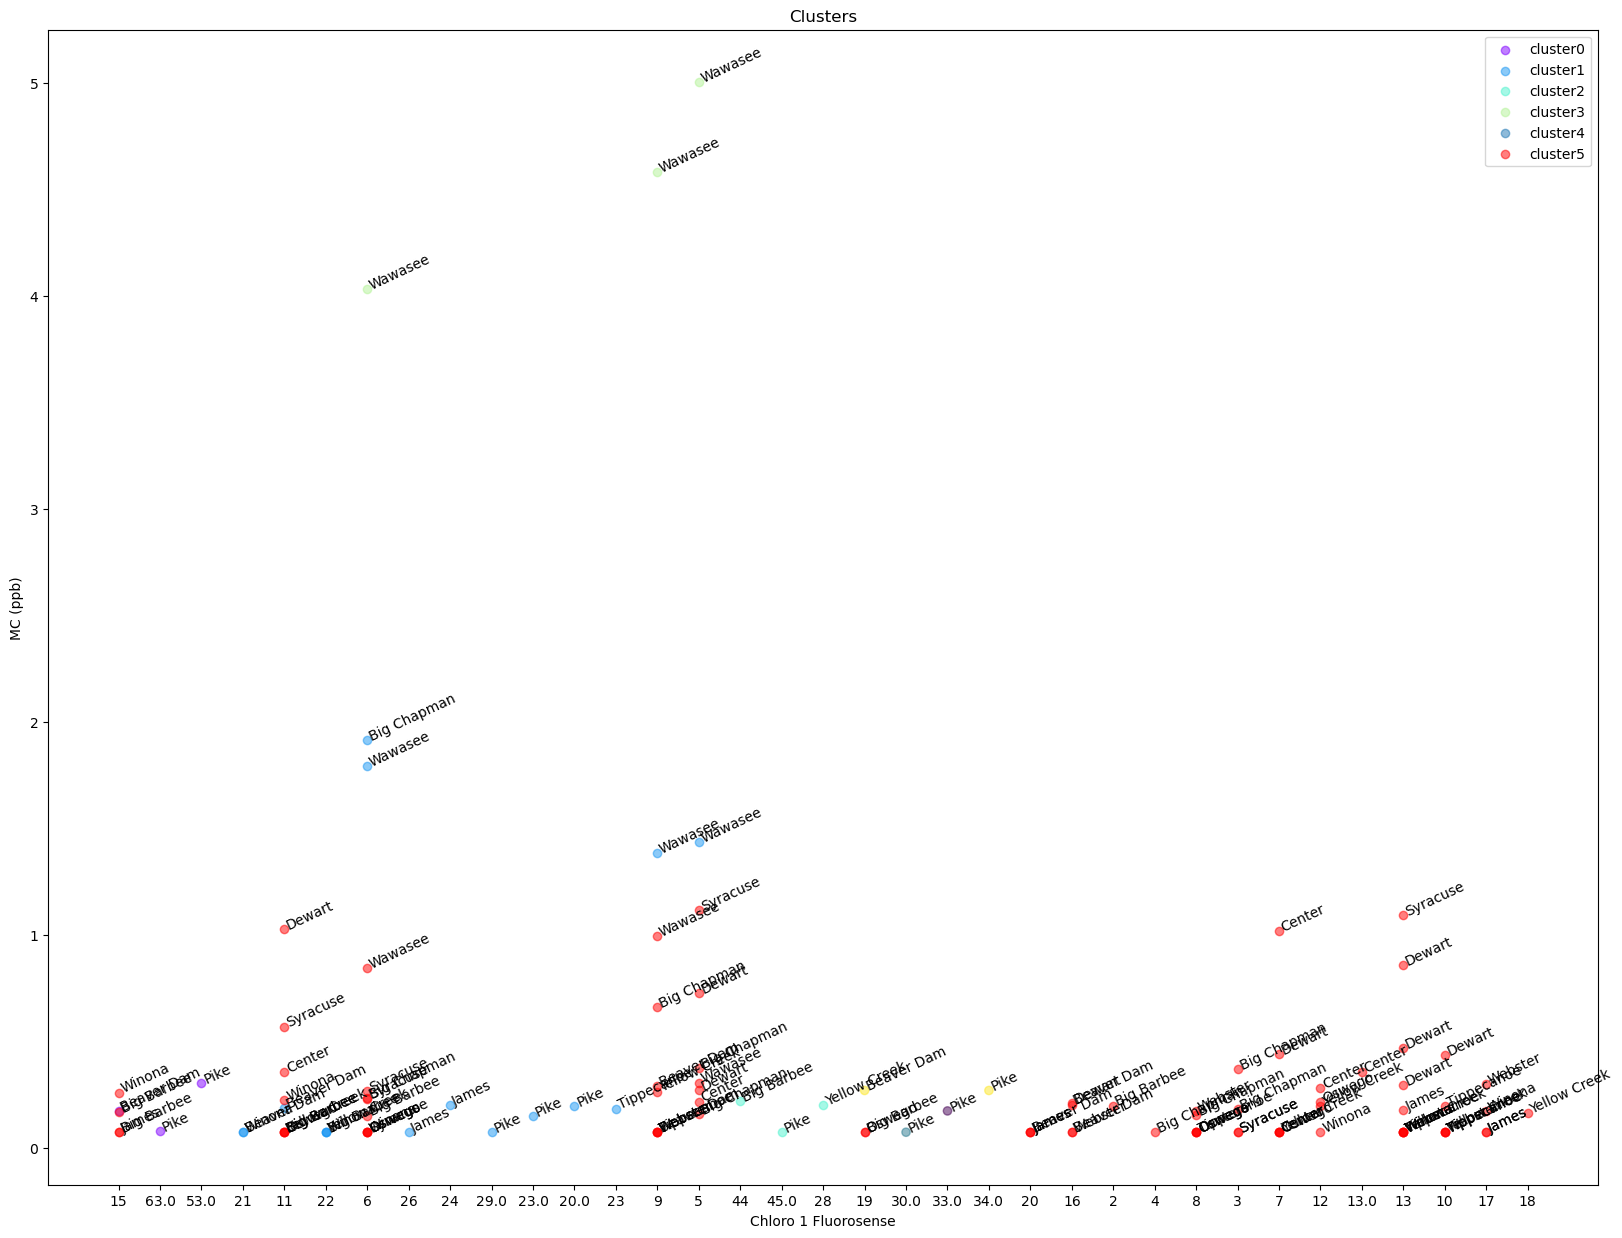

In [452]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(20,15))

for color, label in zip(colors, cluster_labels):
    subset = filtered_pdf[filtered_pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.chloro_1_fluorosense[i], subset.mc_ppb[i],str(subset['lake_name'][i]), rotation=25) 
    plt.scatter(subset.chloro_1_fluorosense, subset.mc_ppb, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Chloro 1 Fluorosense')
plt.ylabel('MC (ppb)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'MC (ppb)')

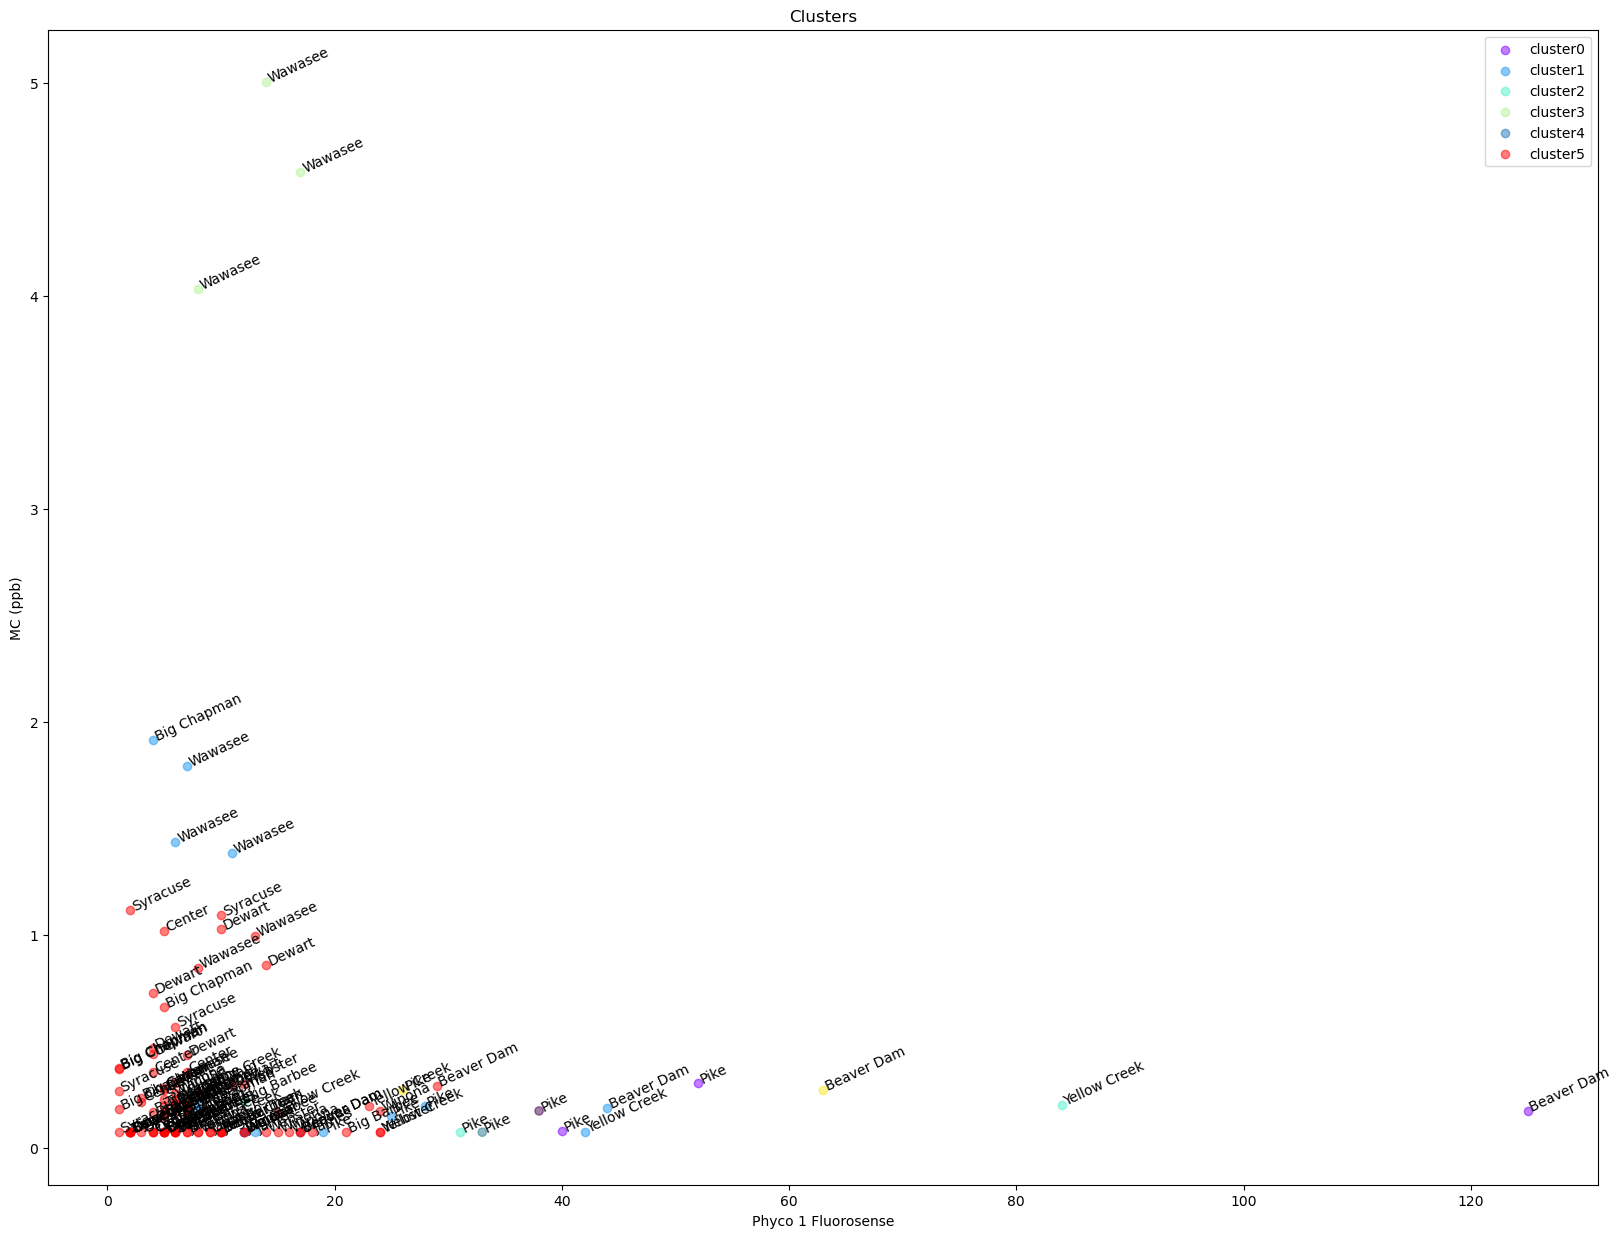

In [453]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(20,15))

for color, label in zip(colors, cluster_labels):
    subset = filtered_pdf[filtered_pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.phyco_1_fluorosense[i], subset.mc_ppb[i],str(subset['lake_name'][i]), rotation=25) 
    plt.scatter(subset.phyco_1_fluorosense, subset.mc_ppb, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Phyco 1 Fluorosense')
plt.ylabel('MC (ppb)')

## Dynamic Time Warping

In [1]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(clean_df)

NameError: name 'clean_df' is not defined